### Import the Libarries

In [ ]:
import numpy as np
import pandas as pd

### Modulating the data with the code sequence

In [ ]:
import numpy as np

def cdma_short(data, chips): #Short Code
    ld = len(data)
    lc = len(chips)
    out = np.zeros(ld*lc)
    i = 0
    for d in data:
        for c in chips:
            out[i] = 1-(d+c)%2 #Unipolar Inverting
            i += 1
    return out

cdma_seq = cdma_short([1,0,0,1,1,0],[1,0,1,0])
print(cdma_seq)

[1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]


### Simple LED Transmitter Channel Model

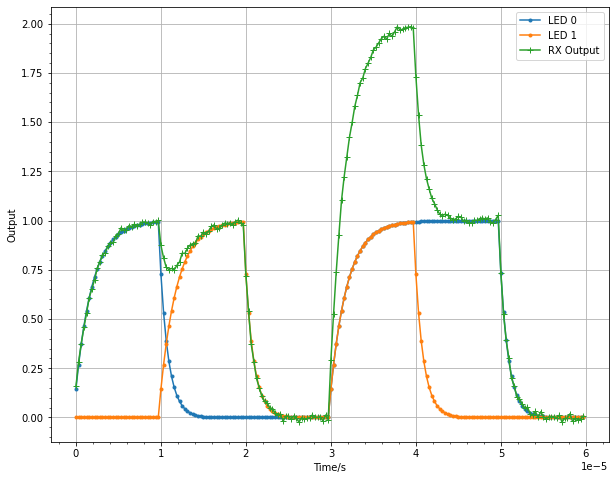

In [ ]:
import numpy as np
from random import gauss
from random import seed
import matplotlib.pyplot as plt



#---------- Parameter Settings -----------
ovs = 32 #Oversampling Factor
rate = 1e5 #Data Rate in Hz = 100 kHz

data = [[1,0,0,1,1,0],[0,1,0,1,0,0]] #Data Streams
data_shift = [0,0] #Shift of Data Streams (Change Synchronization)


#data = [[1,0,0,1,1,0],[1,0,0,1,1,0]] #Same Data Stream x2
#data_shift = [0,int(ovs/2)] #Data Streams Offset 1/2 Bit Duration

#TX
P_max = 1 #LED Maximum Output Power
TauOn = 2e-6 #Tau for Rising Edge in us
TauOff = 1e-6 #Tau for Falling Edge in us

#RX
P_mindetect = 0.0 #Minimum Power which can be detected
P_maxdetect = 5 #Maximum Power which can be detected (otherwise saturation)

n_sigma = 0.01
n_seed = 1
#-----------------------------------------



plt.figure(figsize=(10,8)) #Prepare Plot
seed(n_seed) #Init Random Generator

l = len(data[0])*ovs #Number of Samples
out = np.zeros(l) #Output Vector for Final Result
t = np.zeros(l) #Time Vector
n = np.zeros(l) #Noise Vector
dt = 1/(rate*ovs) #Duration of one Sample

for i in range(l):
    n[i] = gauss(0.0, n_sigma) #Generate Noise Samples
    t[i] = dt*i #Set Time Markers for Plotting

def run_led(d, shift=0, label=''):
    P = 0
    tmp_out = np.zeros(l)
    for i in range(len(d)):
        for j in range(ovs):
            if d[i]: #Data = 1
                P += (P_max - P) * (1-np.exp(-dt/TauOn))
            else: #Data = 0
                P *=  np.exp(-dt/TauOff);
            tmp_out[(i*ovs)+j] = P
    #print(tmp_out)
    if shift:
        tmp_out = np.roll(tmp_out, shift)
    plt.plot(t, tmp_out, marker = '.', linestyle = '-', label = 'LED '+str(label))
    return tmp_out

def show_plot():
    plt.plot(t, out, marker = '+', linestyle = '-', label = 'RX Output')
    plt.minorticks_on()
    plt.ylabel('Output')
    plt.xlabel('Time/s')
    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.show()

i = 0
for d in data: #Process Data Stream and Sum-Up of Outputs
    out += run_led(d, data_shift[i], i)
    i += 1

i = 0
for o in out: #Clipping at Receiver Side
    if o > P_maxdetect:
        out[i] = P_maxdetect
    elif o < P_mindetect:
        out[i] = 0.0
    i += 1
out += n #Add Noise Vector
show_plot()


### Parameter Settings of the model

In [ ]:
import numpy as np
from random import gauss
from random import seed
import matplotlib.pyplot as plt



#---------- Parameter Settings -----------
ovs = 32 #Oversampling Factor
rate = 1e5 #Data Rate in Hz = 100 kHz

data = [[1,0,0,1,1,0],[0,1,0,1,0,0]] #Data Streams
data_shift = [0,0] #Shift of Data Streams (Change Synchronization)


#data = [[1,0,0,1,1,0],[1,0,0,1,1,0]] #Same Data Stream x2
#data_shift = [0,int(ovs/2)] #Data Streams Offset 1/2 Bit Duration

#TX
P_max = 1 #LED Maximum Output Power
TauOn = 2e-6 #Tau for Rising Edge in us
TauOff = 1e-6 #Tau for Falling Edge in us

#RX
P_mindetect = 0.0 #Minimum Power which can be detected
P_maxdetect = 5 #Maximum Power which can be detected (otherwise saturation)

n_sigma = 0.01
n_seed = 1
#-----------------------------------------

plt.figure(figsize=(10,8)) #Prepare Plot
seed(n_seed) #Init Random Generator
l = len(data[0])*ovs #Number of Samples
out = np.zeros(l) #Output Vector for Final Result
t = np.zeros(l) #Time Vector
n = np.zeros(l) #Noise Vector
dt = 1/(rate*ovs) #Duration of one Sample


<Figure size 720x576 with 0 Axes>